In [61]:
import matplotlib.pyplot as plt
import numpy as np

In [62]:
fpaths = "../testes_seq_paral/test_staub_tudo_test_new_n/"

sizes = ["small", "medium", "large"]
threads = [2, 4, 8, 16]
threads_mpi_pthreads = [4, 6, 8, 10, 12, 18]
speedups = []

cpu_migrations = {}
cycles = {}

for i in sizes:
    for j in threads:
        cpu_migrations_local = []
        cycles_local = []
        paralelo_local = []
        # print(f"pthreads - {i} threads {j}")
        with open(f"{fpaths}logs_paralelo/log_paralelo_{i}_{j}_out.txt", "r") as arquivo:
            for linha in arquivo:
                if "cpu-migrations" in linha:
                    aux = linha.split("cpu-migrations")
                    aux = aux[0]
                    cpu_migrations_local.append(float(aux))
            aux = np.mean(cpu_migrations_local)
            aux = {f"{i}, {j}": cpu_migrations_local}
            cpu_migrations.update(aux)

dados = []
label = []
for i in cpu_migrations:
    if "small" not in i:
        dados.append(cpu_migrations[i])
        label.append(i)


dados_media = []

for i in dados:
    dados_media.append(np.mean(i))

In [63]:
fpaths = "../testes_seq_paral/test_greff_tudo_test_new_n/"

sizes = ["small", "medium", "large"]
threads = [2, 4, 8, 16]
threads_mpi_pthreads = [4, 6, 8, 10, 12, 18]
speedups = []

cpu_migrations = {}
cycles = {}

for i in sizes:
    for j in threads:
        cpu_migrations_local = []
        cycles_local = []
        paralelo_local = []
        # print(f"pthreads - {i} threads {j}")
        with open(f"{fpaths}logs_paralelo/log_paralelo_{i}_{j}_out.txt", "r") as arquivo:
            for linha in arquivo:
                if "cpu-migrations" in linha:
                    aux = linha.split("cpu-migrations")
                    aux = aux[0]
                    cpu_migrations_local.append(float(aux))
            aux = np.mean(cpu_migrations_local)
            aux = {f"{i}, {j}": cpu_migrations_local}
            cpu_migrations.update(aux)

dados = []
label2 = []
for i in cpu_migrations:
    if "small" not in i:
        dados.append(cpu_migrations[i])
        label2.append(i)


dados_media2 = []

for i in dados:
    dados_media2.append(np.mean(i))

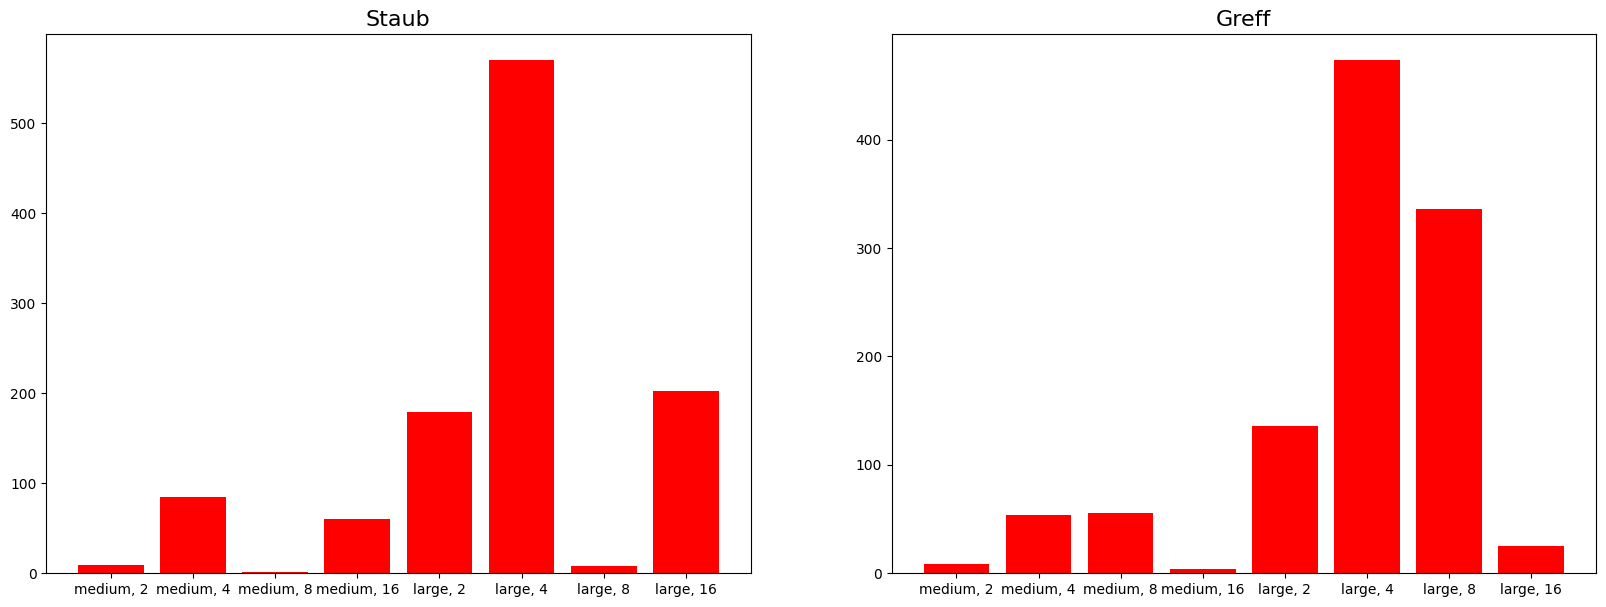

In [67]:
fig = plt.figure(figsize = (20, 7))
plt.subplot(1, 2, 1)
plt.title("Staub", fontsize=16)
plt.bar(label, dados_media, color="red")
plt.subplot(1, 2, 2)
plt.title("Greff", fontsize=16)
plt.bar(label2, dados_media2, color="red")
plt.show()

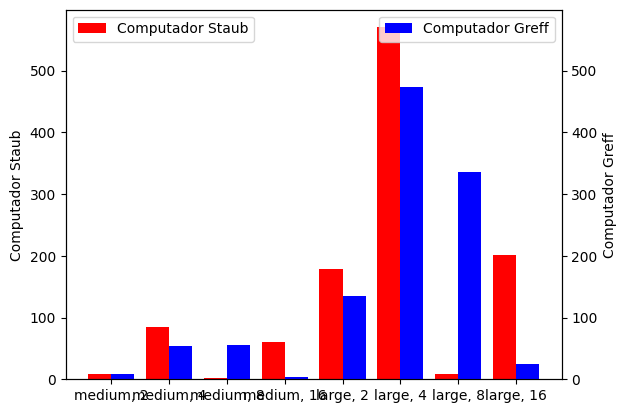

In [96]:
width = 0.4

figure, left_ax = plt.subplots()
left_bars = left_ax.bar(label, dados_media, color='red', width=-width, align='edge', label='Computador Staub')
left_ax.set_ylabel('Computador Staub')

right_ax = left_ax.twinx()
right_bars = right_ax.bar(label2, dados_media2, color='blue', width=width, align='edge', label='Computador Greff')
right_ax.set_ylabel('Computador Greff')

right_ax.set_ylim(left_ax.get_ylim())

left_legend = plt.legend(handles=[left_bars], loc='upper left')
right_legend = plt.legend(handles=[right_bars], loc='upper right')


plt.gca().add_artist(left_legend)

plt.show()

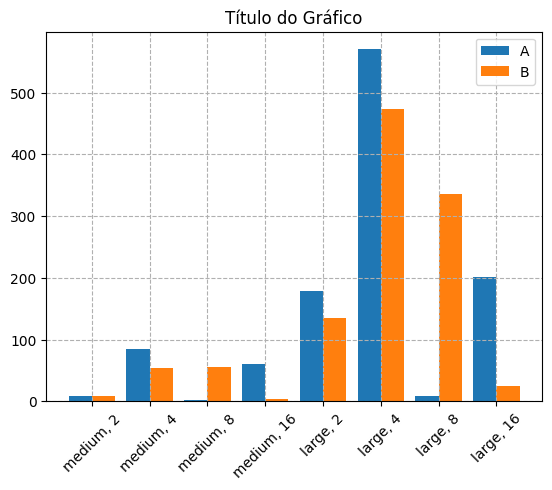

In [111]:
X_axis = np.arange(len(dados_media))

# Crie o gráfico de barras
fig, ax = plt.subplots()
ax.bar(X_axis - 0.2, dados_media, 0.4, label='A')
ax.bar(X_axis + 0.2, dados_media2, 0.4, label='B')

ax.set_xticks(X_axis)
ax.set_xticklabels(label)
ax.set_xticklabels(label, rotation=45)
ax.set_title("Título do Gráfico")
ax.legend()

# Adicione linhas de grade no fundo
ax.grid(linestyle='--')

plt.show()